In [88]:
from fastqaoa.indicator import get_indicator_interpolator, interpolate_diagonals

import numpy as np

import matplotlib.pyplot as plt
from colorsys import hls_to_rgb
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

import pandas as pd

import quantum_plots as qp
qp.global_setup(fontsize=11)


{'fontsizes': {'tiny': 6,
  'scriptsize': 8,
  'footnotesize': 9,
  'small': 10,
  'normalsize': 11,
  'large': 12,
  'Large': 14,
  'LARGE': 17,
  'huge': 20,
  'Huge': 25},
 'colors': {'quantumviolet': '#53257F', 'quantumgray': '#555555'}}

In [78]:
interp = get_indicator_interpolator(M=4, subdiv=4, shift=0)

In [79]:
Nx = 400
Ny = 400


g = np.linspace(-1, 1, Nx)
th = interp(g)
yf = np.linspace(-np.pi, np.pi, Ny)

func = lambda yf, th: (np.exp(1j * yf[:, None]) + 1) * 0.5 + 0.5 *(np.exp(1j * yf[:, None]) - 1) * th[None, :]

x = func(yf, th)

In [80]:
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r)
    s = 0.6

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    print(c.shape)
    c = c.swapaxes(0, 2)
    return c.swapaxes(0, 1)

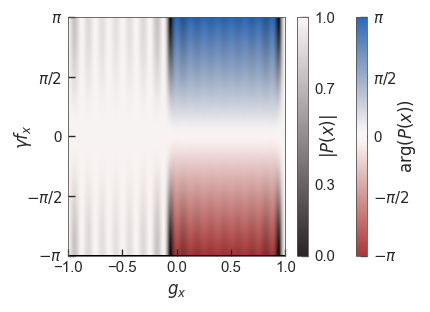

In [181]:
fig, ax = qp.plot_setup(aspect_ratio=0.8)
ax.set_facecolor("black")
ax.imshow(np.angle(x), extent=[g[0], g[-1], yf[0], yf[-1]], aspect="auto", cmap=sns.color_palette("vlag", as_cmap=True), alpha=np.abs(x))



# ax.contour(np.angle(x), extent=[g[0], g[-1], yf[0], yf[-1]], colors="black", linestyles="-")
ax.set_xlabel(r"$g_x$")

# ax.set_xticks(np.arange(-1, 1.25, 0.25), ["-1", r"$-\frac{3}{4}$", r"$-\frac{1}{2}$", r"$-\frac{1}{4}$", "-1", r"$-\frac{3}{4}$", r"$-\frac{1}{2}$", r"$-\frac{1}{4}$", "1"])
ax.set_ylabel(r"$\gamma f_x$", labelpad=-5)

ax.set_yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi / 2), [r"$-\pi$", r"$-\pi / 2$", "0", r"$\pi/2$", r"$\pi$"])

divider = make_axes_locatable(ax)
# sub_ax1 = fig.add_axes([0.95, 0.1, 0.03, 1])
cax1 = divider.append_axes('right', size='5%', pad=0.1)
# cax2 = divider.append_axes('right', size='5%', pad=0.2)
#

vcolor = sns.color_palette("vlag", 3)[1]

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cm = mpl.cm.ScalarMappable(norm=norm, cmap=sns.dark_palette(vcolor, as_cmap=True))
plt.colorbar(cm, cax=cax1)
cax1.set_ylabel(r"$|P(x)|$", labelpad=-10)
cax1.set_yticks([0, 0.7, 0.3, 1])

cax2 = divider.append_axes('right', size='5%', pad=0.4)
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
cm = mpl.cm.ScalarMappable(norm=norm, cmap=sns.color_palette("vlag_r", as_cmap=True))
plt.colorbar(cm, cax=cax2)
cax2.set_ylabel(r"$\arg(P(x))$", labelpad=-8)
cax2.set_yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi / 2), [r"$-\pi$", r"$-\pi / 2$", "0", r"$\pi/2$", r"$\pi$"])

plt.savefig("plots/if_nonunitary_operation.pdf", bbox_inches="tight")

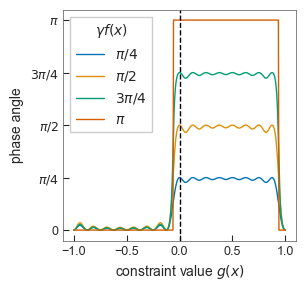

In [177]:
plt.subplots(figsize=(3, 3))

yf2 = np.array([1, 2, 3, 4]) / 4 * np.pi
yfn = [r"$\pi / 4$", r"$\pi / 2$", r"$3 \pi / 4$", r"$\pi$"]
x2 = func(yf2, th)

v = [{"angle": np.angle(xii), "prob": np.abs(xii) ** 2, "yf": yfi, "g": gi, "yfn": yfni} for xi, yfi, yfni in zip(x2, yf2, yfn) for xii, gi in zip(xi, g)]
df = pd.DataFrame(v)

sns.lineplot(df, x="g", y="angle", hue="yfn", legend=True, palette="colorblind")
plt.gca().get_legend().set_title(r"$\gamma f(x)$")

plt.ylabel(r"phase angle")
plt.xlabel("constraint value $g(x)$")
plt.xticks(np.linspace(-1, 1, 5))
plt.yticks(np.linspace(0, np.pi, 5), [0, r"$\pi / 4$", r"$\pi / 2$",  r"$3\pi / 4$", r"$\pi$"])

plt.axvline(0, color="k", linestyle="dashed")

fig.tight_layout()

plt.savefig("plots/if_phase.pdf", bbox_inches="tight", transparent=True)

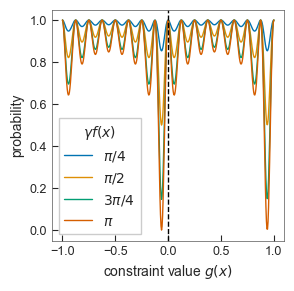

In [178]:
plt.subplots(figsize=(3, 3))
sns.lineplot(df, x="g", y="prob", hue="yfn", legend=True, palette="colorblind")
plt.gca().get_legend().set_title(r"$\gamma f(x)$")

plt.ylabel(r"probability")
plt.xlabel("constraint value $g(x)$")
plt.xticks(np.linspace(-1, 1, 5))

plt.axvline(0, color="k", linestyle="dashed")

fig.tight_layout()


plt.savefig("plots/if_prob.pdf", bbox_inches="tight", transparent=True)

In [183]:

g = np.linspace(-1, 1, Nx)

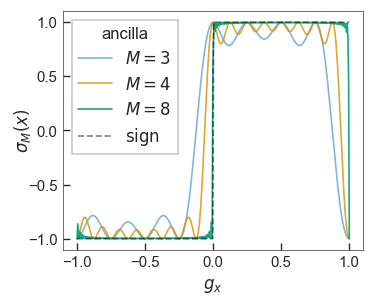

In [217]:
qp.plot_setup(aspect_ratio=0.8)

sns.set_palette("colorblind")


interp = get_indicator_interpolator(M=3, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=3$", alpha=0.5)
interp = get_indicator_interpolator(M=4, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=4$", alpha=0.8)
interp = get_indicator_interpolator(M=8, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=8$", alpha=0.9)

plt.plot(g, np.sign(g), color="k", label=r"$\mathrm{sign}$", linestyle="dashed", alpha=0.5)

plt.legend(title="ancilla")
plt.ylabel(r"$\sigma_M(x)$", labelpad=-3)
plt.xlabel("$g_x$")

plt.savefig("plots/if_sign.pdf", bbox_inches="tight")